In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import datetime
from WindPy import w
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2020 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [2]:
def stock_data(stockList, factor, startDate, endDate):
    data = w.wsd(stockList, factor, startDate, endDate, "")
    df = pd.DataFrame(data.Data, columns = data.Times, index = stockList).T
    return df

In [3]:
pd.set_option("display.max_rows",None)

In [4]:
stockList = ["000300.SH","000905.SH","399006.SZ","881001.WI"]
startDate = "20110101"
endDate = "20210101"
testStartDate  = datetime.date.fromisoformat('2016-01-04')
N = 1 # N-month return of index

stockClosedf = stock_data(stockList, 'CLOSE', startDate, endDate)
stockPEdf = stock_data(stockList, "pe_ttm", startDate, endDate)
bond_10y = (w.edb("M1001654", startDate, endDate,usedf=True)[1]/100).rename(columns={"CLOSE":"bond_10y"})
bond_1y = (w.edb("M1001646", startDate, endDate,usedf=True)[1]/100).rename(columns={"CLOSE":"bond_1y"})

bonddf = pd.concat([bond_10y,bond_1y],axis = 1)
bonddf['diff'] = bonddf['bond_10y']-bonddf['bond_1y']
merged_data = pd.concat([1/stockPEdf,bonddf],axis = 1,join = 'inner')
merged_data

,000300.SH,000905.SH,399006.SZ,881001.WI,bond_10y,bond_1y,diff
2011-01-04,0.063310,0.022933,0.013914,0.049036,0.038534,0.032206,0.006328
2011-01-05,0.063795,0.022853,0.013940,0.049228,0.038409,0.030766,0.007643
2011-01-06,0.064236,0.022975,0.014184,0.049540,0.038410,0.029956,0.008454
2011-01-07,0.063769,0.023103,0.014312,0.049313,0.038704,0.029726,0.008978
2011-01-10,0.064731,0.023781,0.014738,0.050202,0.038517,0.029216,0.009301
2011-01-11,0.064326,0.023984,0.014940,0.050123,0.038819,0.029615,0.009204
2011-01-12,0.063972,0.023840,0.014807,0.049833,0.038803,0.029230,0.009573
2011-01-13,0.063737,0.023878,0.014764,0.049636,0.038961,0.028650,0.010311
2011-01-14,0.064472,0.024365,0.015117,0.050345,0.039193,0.028822,0.010371
2011-01-17,0.066771,0.025460,0.015692,0.052283,0.039106,0.028865,0.010241


# 国债收益率

<AxesSubplot:>

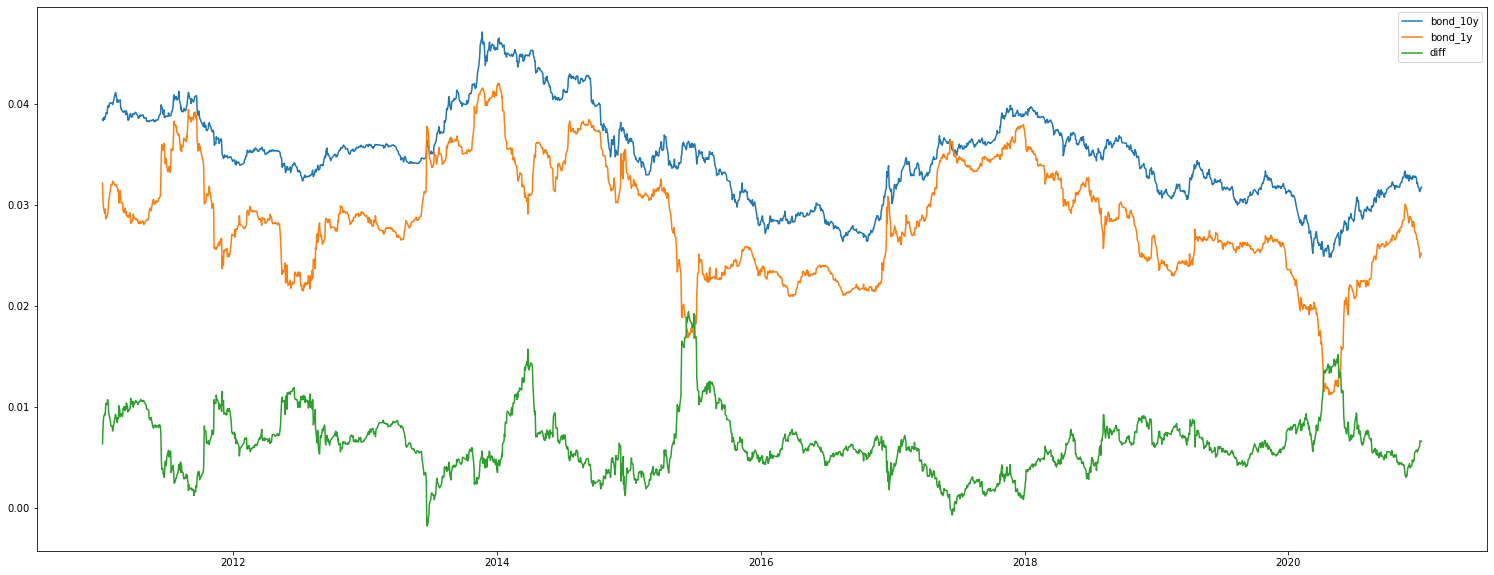

In [5]:
bonddf.plot(figsize = (26,10))

# 期限利差
# (13&17)年 年中存在0左右的极值

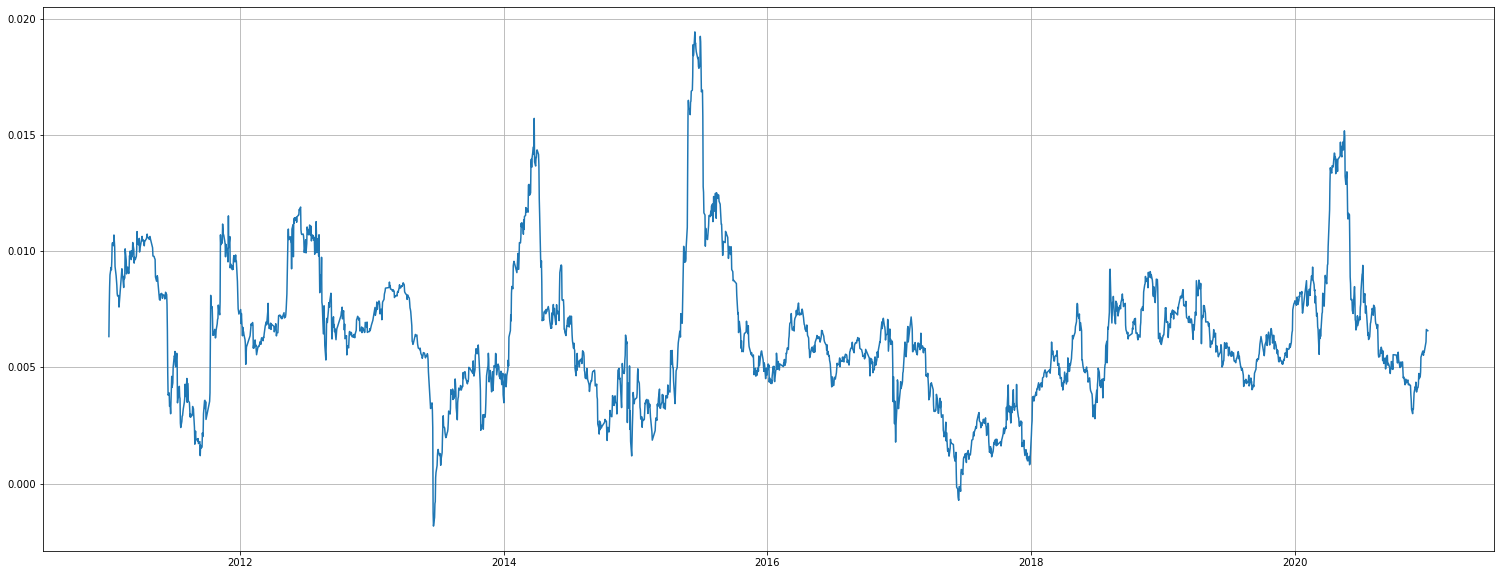

In [6]:
bonddf['diff'].plot(figsize = (26,10)).grid()

# 指数EP

<AxesSubplot:>

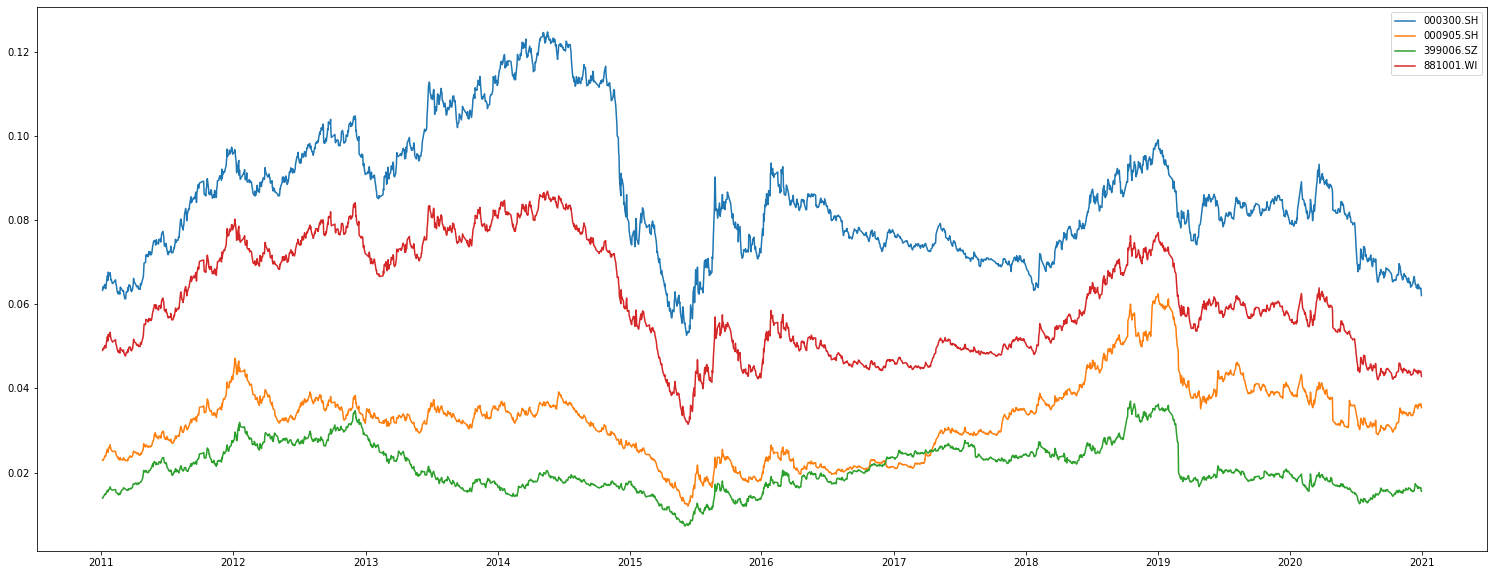

In [7]:
(1/stockPEdf).plot(figsize = (26,10))

# 指数价格

<AxesSubplot:>

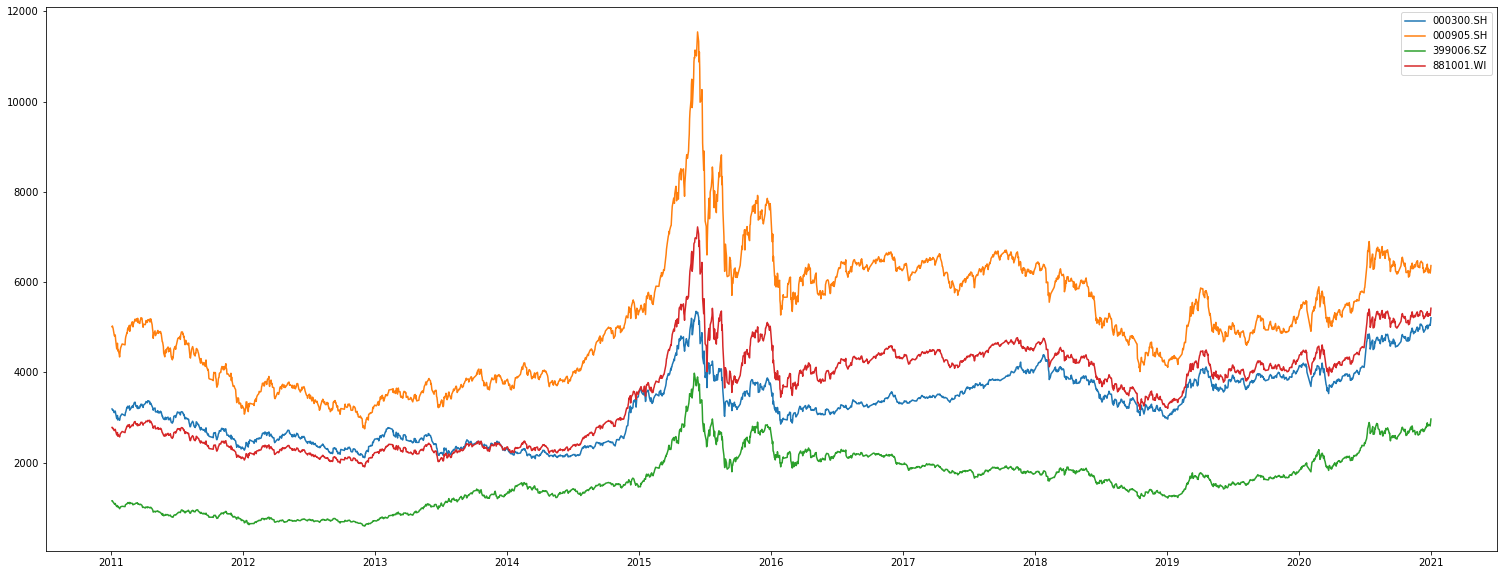

In [8]:
stockClosedf.plot(figsize = (26,10))

In [9]:
returnRatio = pd.DataFrame(index = stockList,columns = merged_data.index).T
for i in stockList:
    returnRatio[i] = merged_data[i].T / merged_data[merged_data.columns[-1]].T
returnRatio = np.around(returnRatio, decimals = 2, out = None)
returnRatio

,000300.SH,000905.SH,399006.SZ,881001.WI
2011-01-04,10.00,3.62,2.20,7.75
2011-01-05,8.35,2.99,1.82,6.44
2011-01-06,7.60,2.72,1.68,5.86
2011-01-07,7.10,2.57,1.59,5.49
2011-01-10,6.96,2.56,1.58,5.40
2011-01-11,6.99,2.61,1.62,5.45
2011-01-12,6.68,2.49,1.55,5.21
2011-01-13,6.18,2.32,1.43,4.81
2011-01-14,6.22,2.35,1.46,4.85
2011-01-17,6.52,2.49,1.53,5.11


# 指数EP 除以 期限利差
## 可以看出当期限利差趋于0时，比值变得很大，会干扰运算结果

<AxesSubplot:>

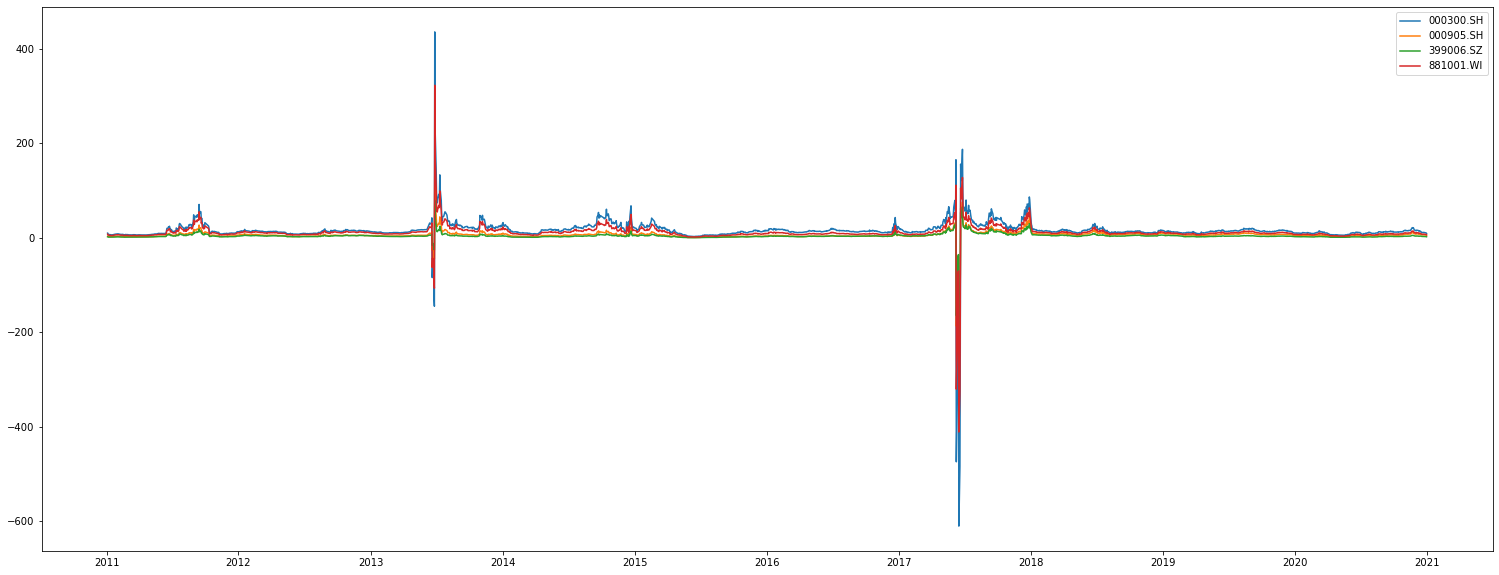

In [10]:
returnRatio.plot(figsize = (26,10))

# 指数EP 除以 期限利差的绝对值；并处理掉极值

<AxesSubplot:>

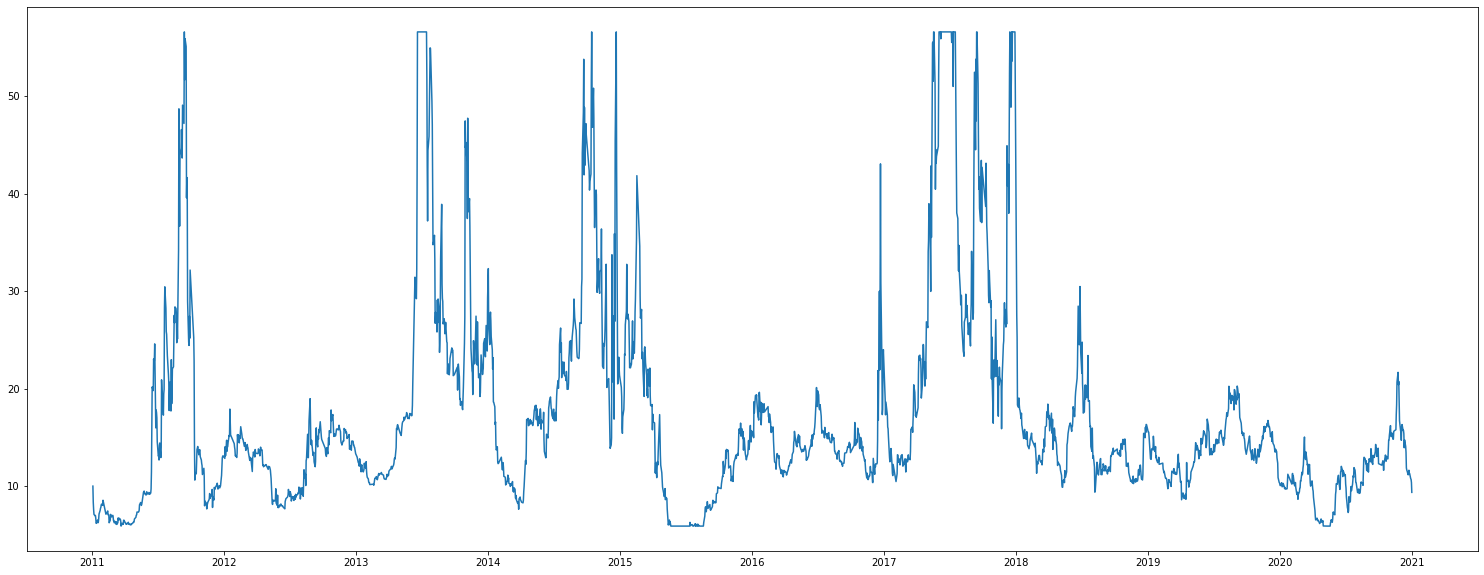

In [11]:
abs(returnRatio).clip(lower = abs(returnRatio).quantile(.025), upper = abs(returnRatio).quantile(.975),axis = 1)['000300.SH'].plot(figsize = (26,10))

# 期限利差与指数EP关系

## 可以看出期限利差和创业板相关性最强，但绝对值依旧很低

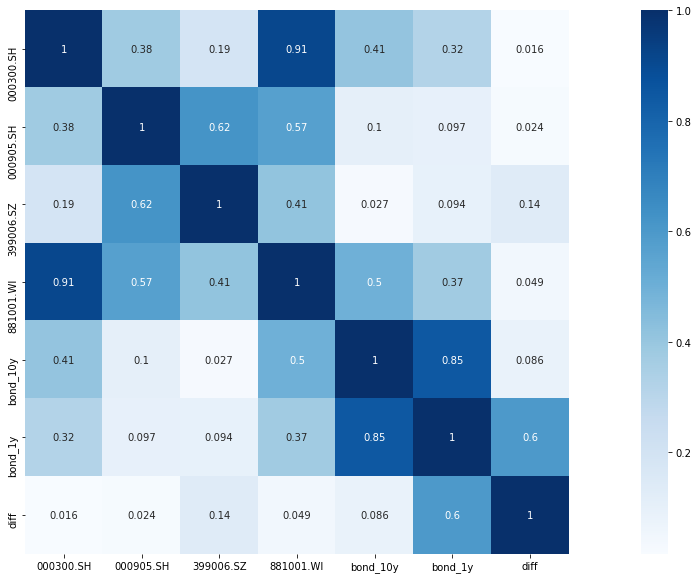

In [12]:
import seaborn as sns
def corr_heat(df):
    dfData = abs(df.corr())
    plt.subplots(figsize=(26, 10)) # 设置画面大小
    sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="Blues")
    # plt.savefig ('./BluesStateRelation.png')
    plt.show()

corr_heat(merged_data)

# 期限利差与指数价格关系

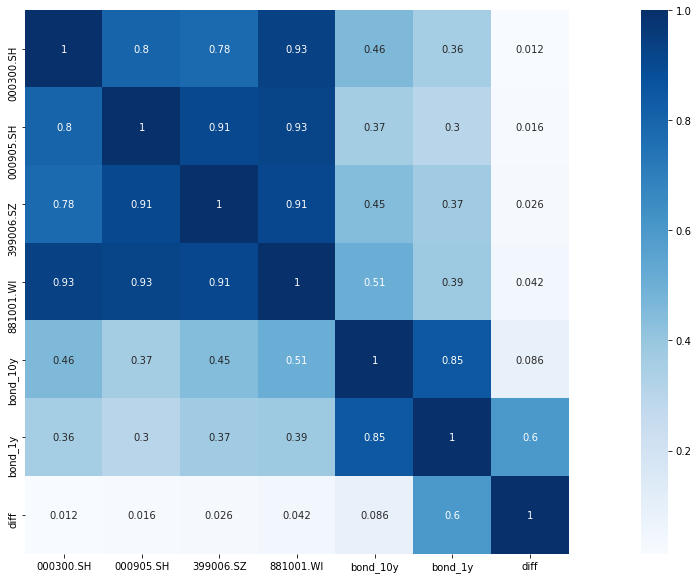

In [13]:
corr_heat(pd.concat([stockClosedf,bonddf],axis = 1,join = 'inner'))